In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Test Convergence for MonteCarlo Variance Reduction ###

In [29]:
from ipynb.fs.full.MonteCarlo_European import S1_GBM
from ipynb.fs.full.MonteCarlo_European import MC_Euro
from ipynb.fs.full.VarReduceAT_MonteCarlo import S1AV_GBM
from ipynb.fs.full.VarReduceAT_MonteCarlo import MCAV_Euro
from ipynb.fs.full.VarReduceCV_MonteCarlo import S1_GBM
from ipynb.fs.full.VarReduceCV_MonteCarlo import BSprice
from ipynb.fs.full.VarReduceCV_MonteCarlo import BSdelta
from ipynb.fs.full.VarReduceCV_MonteCarlo import MCCV_Euro


# calculate parameters
S0=100
K=90
r=0.06
sigma=0.2
div=0.03
T=1
Nsteps=300

NSims=np.logspace(1.5,3,10).astype(int) # simulation sizes

price_mean_MC=[]
price_std_MC=[]

price_mean_AT=[]
price_std_AT=[]

price_mean_CV=[]
price_std_CV=[]

for nsim in NSims:
    price_arr=[]
    for ntrials in range(100):
        price=MC_Euro(S0=S0, K=K, r=r, sigma=sigma, div=div, T=1, Nsteps=Nsteps, Nsim=nsim, optype='call')
        price_arr.append(price)
    price_mean_MC.append(np.mean(price_arr))
    price_std_MC.append(np.std(price_arr))

    price_arr=[]
    for ntrials in range(100):
        price=MCAV_Euro(S0=S0, K=K, r=r, sigma=sigma, div=div, T=1, Nsteps=Nsteps, Nsim=nsim, optype='call')
        price_arr.append(price)
    price_mean_AT.append(np.mean(price_arr))
    price_std_AT.append(np.std(price_arr))

    price_arr=[]
    for ntrials in range(100):
        price=MCCV_Euro(S0=S0, K=K, r=r, sigma=sigma, div=div, T=1, Nsteps=Nsteps, Nsim=nsim, optype='call')
        price_arr.append(price)
    price_mean_CV.append(np.mean(price_arr))
    price_std_CV.append(np.std(price_arr))

price_BS=BSprice(St=S0, K=K, r=r, sigma=sigma, div=div, Tm=1, optype='call')


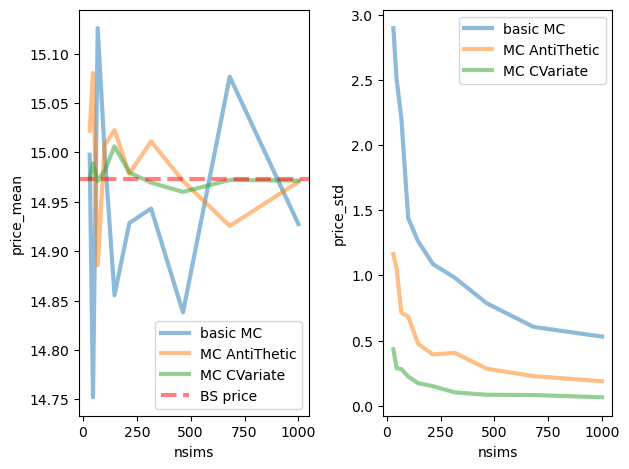

In [30]:
fig,ax=plt.subplots(nrows=1, ncols=2)
ax[0].plot(NSims, price_mean_MC, lw=3, alpha=0.5, label='basic MC')
ax[0].plot(NSims, price_mean_AT, lw=3, alpha=0.5, label='MC AntiThetic')
ax[0].plot(NSims, price_mean_CV, lw=3, alpha=0.5, label='MC CVariate')
ax[0].axhline(price_BS, lw=3, ls='--', color='red', alpha=0.5, label='BS price')
ax[0].set_xlabel('nsims')
ax[0].set_ylabel('price_mean')
ax[0].legend()

ax[1].plot(NSims, price_std_MC, lw=3, alpha=0.5, label='basic MC')
ax[1].plot(NSims, price_std_AT, lw=3, alpha=0.5, label='MC AntiThetic')
ax[1].plot(NSims, price_std_CV, lw=3, alpha=0.5, label='MC CVariate')
ax[1].set_xlabel('nsims')
ax[1].set_ylabel('price_std')
ax[1].legend()

plt.tight_layout()


